In [1]:
%matplotlib inline

import numpy as np
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import datetime

import sys
sys.path.append('C:\\projects\\finances.git\\finances')

from market.market_data import MarketData
mkt = MarketData()

C:\Anaconda3\envs\finance\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


In [2]:
from porfolio.portfolio import PortFolio

Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


In [3]:
portfolio_assets = {
    'BTC': 0.007,
    'ETH': 2.14081,
    'XRP': 922.5,
    'ADA': 926,
    'XLM': 929.07,
    'LTC': 1.0,
    'TRX': 2760,
    'UBQ': 18.222,
    'BIS': 36.6,
    'IOTA': 47.553,
    'EMC2': 45,
    'FUN': 633.366,
    'ADST': 136.71
}

new_portfolio_assets = {
    'BTC': 0.007,
    'ETH': 2.14081,
    'XRP': 922.5,
    'ADA': 926,
    'XLM': 929.07,
    'LTC': 1.0,
    'TRX': 2760,
    'UBQ': 18.222,
    'BIS': 36.6,
    'IOTA': 47.553,
    'EMC2': 45,
    'FUN': 633.366,
    'ADST': 136.71
}

assets_effective_price = {
    'BTC': 0.1,
    'ETH': 454.96,
    'XRP': 0.772,
    'ADA': 0.404,
    'XLM': 0.378,
    'LTC': 208.23,
    'TRX': 0.0668,
    'UBQ': 5.7,
    'BIS': 3.48,
    'IOTA': 3.08,
    'EMC2': 0.769,
    'FUN': 0.0897,
    'ADST': 0.817   
}

In [4]:
import pylab as plt
import seaborn as sns
from pprint import pprint

sns.set()

myportfolio = PortFolio(
    name= 'PedroPortfolio'
    )

Loaded portfolio database from C:\projects\finances.git\finances\porfolio\PedroPortfolio\assets_allocation_data.csv


# Portfolio Comparison

In [5]:
myportfolio.assets_data

,ADA,ADST,BCH,BIS,BTC,DASH,EMC2,ETH,FUN,IOTA,LTC,NEO,TRX,UBQ,XLM,XMR,XRP
2018-01-01,926.000,136.71,0.0,36.600000,0.007000,0.000000,45.0,2.14081,633.366,47.553,1.0,0.00,2760.000,18.222000,929.07,0.00000,922.5
2018-02-06,0.073,136.71,0.0,36.592335,0.080743,0.286593,45.0,2.14081,2550.366,47.553,1.5,2.04,0.237,18.222222,279.07,1.32867,130.0


In [6]:
optimized_pfl = PortFolio()
optimized_pfl.assets = new_portfolio_assets
optimized_pfl.assets

{'ADA': 926,
 'ADST': 136.71,
 'BIS': 36.6,
 'BTC': 0.007,
 'EMC2': 45,
 'ETH': 2.14081,
 'FUN': 633.366,
 'IOTA': 47.553,
 'LTC': 1.0,
 'TRX': 2760,
 'UBQ': 18.222,
 'XLM': 929.07,
 'XRP': 922.5}

In [7]:
optimal_allocation = optimized_pfl.optimize_allocation(target_return=0.1, date=datetime.datetime(2017,11,1))
optimal_allocation

Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


,weights,prices,allocation_euros,coin_quantities
BTC,0.326119,5827.859111,32.611928,0.005596
ETH,0.179859,251.197038,17.985884,0.071601
XRP,0.000000,0.167175,0.000000,0.000000
ADA,0.000000,0.019795,0.000000,0.000000
XLM,0.057243,0.023556,5.724260,243.008489
LTC,0.077632,45.797451,7.763235,0.169512
TRX,0.000000,0.002162,0.000000,0.000000
UBQ,0.102831,0.981743,10.283103,10.474333
BIS,0.047929,0.352252,4.792895,13.606438
IOTA,0.075480,0.313400,7.548015,24.084290


In [8]:
optimal_assets = optimal_allocation['coin_quantities'].to_dict()
optimal_assets

{'ADA': 0.0,
 'ADST': 42.94566042416478,
 'BIS': 13.60643802790846,
 'BTC': 0.005595867669343863,
 'EMC2': 54.76162715920333,
 'ETH': 0.07160070243699852,
 'FUN': 412.8949778798044,
 'IOTA': 24.084290304956596,
 'LTC': 0.16951238155413184,
 'TRX': 0.0,
 'UBQ': 10.474332836628099,
 'XLM': 243.00848868822933,
 'XRP': 0.0}

## Optimize the portfolio continuously

In [30]:
optimized_pfl.assets_data = pd.DataFrame()
start_date = datetime.datetime(2017,10,1)
time_delta = datetime.timedelta(days=7)
end_date = datetime.datetime.now()

time = start_date
value = 100
while time<end_date:
    optimal_df = optimized_pfl.optimize_allocation(target_return=0.05, projection_steps=7, date=time, value_to_invest=value)
    optimal_assets = optimal_df['coin_quantities'].to_dict()
    optimized_pfl.insert_assets_at_date(assets=optimal_assets, date=time)
    time+=time_delta
    optimized_pfl.update_data()
    value=optimized_pfl.values_data.loc[:time]['TOTAL'].iloc[-1]
optimized_pfl.assets_data

,ADA,ADST,BIS,BTC,EMC2,ETH,FUN,IOTA,LTC,TRX,UBQ,XLM,XRP
2017-10-01,0.0,81.649934,0.0,0.013043,0.0,0.065738,0.0,8.178403,0.089669,0.0,2.960718,1031.994822,0.0
2017-10-08,0.0,69.997354,0.0,0.011115,0.0,0.104398,0.0,10.601533,0.139380,0.0,3.775934,698.199072,0.0
2017-10-15,0.0,90.381937,0.0,0.011604,0.0,0.103003,0.0,0.000000,0.097759,0.0,0.000000,1056.126650,0.0
2017-10-22,0.0,92.496461,0.0,0.009692,0.0,0.145966,0.0,17.241671,0.117075,0.0,5.709895,510.839876,0.0
2017-10-29,0.0,112.537562,0.0,0.010013,0.0,0.119969,0.0,15.507417,0.155150,0.0,5.277435,603.781314,0.0
2017-11-05,0.0,97.387567,0.0,0.008081,0.0,0.167439,0.0,22.124347,0.098899,0.0,7.382936,630.729186,0.0
2017-11-12,0.0,115.457755,0.0,0.010264,0.0,0.146760,0.0,10.144249,0.096522,0.0,5.642445,646.233969,0.0
2017-11-19,0.0,108.775229,0.0,0.010098,0.0,0.141643,0.0,8.140265,0.154417,0.0,9.049882,580.141260,0.0
2017-11-26,0.0,98.381233,0.0,0.010778,0.0,0.143826,0.0,11.490550,0.165000,0.0,5.927693,494.715183,0.0
2017-12-03,0.0,106.767015,0.0,0.010931,0.0,0.168418,0.0,7.430238,0.154064,0.0,8.120027,379.015882,0.0


In [31]:
myportfolio.insert_assets_at_date(assets=portfolio_assets, date=start_date)
myportfolio.update_data()

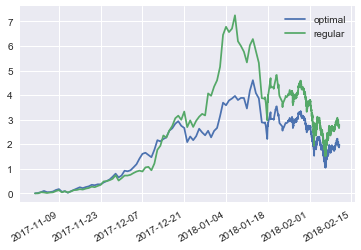

In [32]:
optimized_pfl.relative_variation_since(start_date=datetime.datetime(2017,11,1))['TOTAL'].plot(label='optimal')
myportfolio.relative_variation_since(start_date=datetime.datetime(2017,11,1))['TOTAL'].plot(label='regular')
plt.legend()